2023-12-14 20:47:06.485718: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


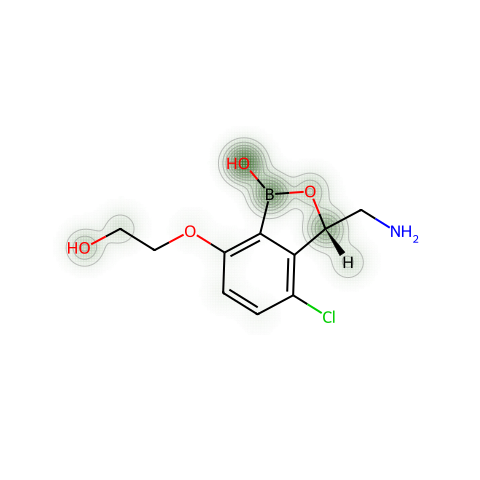

In [1]:
import tensorflow as tf
from molgraph.models import GradientActivationMapping
from molgraph.chemistry import vis
from helpers import encode


def make_gradcam_heatmap(input_structure, model="./saved_models/GCNII", return_prob=False):
    model = tf.keras.models.load_model(model)
    gam_model = GradientActivationMapping(
        model,
        [i.name for i in model.layers if "conv" in i.name], # all conv layers by default
        output_activation=None,
        discard_negative_values=True
    )
    graph = encode(input_structure)
    gam = gam_model(graph)
    if return_prob:
        return model.predict(graph)
    return vis.visualize_maps(molecule=input_structure, maps=gam[0])

ibrutnib = "InChI=1S/C22H22N6O3/c1-4-19(29)27-8-7-15(12-27)28-22-20(21(23)24-13-25-22)18(26-28)6-5-14-9-16(30-2)11-17(10-14)31-3/h4,9-11,13,15H,1,7-8,12H2,2-3H3,(H2,23,24,25)/t15-/m0/s1"
ganfeborole = "InChI=1S/C10H13BClNO4/c12-6-1-2-7(16-4-3-14)10-9(6)8(5-13)17-11(10)15/h1-2,8,14-15H,3-5,13H2/t8-/m1/s1"
make_gradcam_heatmap(ganfeborole, "../saved_models/GCNII/")

In [3]:
make_gradcam_heatmap(ganfeborole, "../saved_models/GCNII/", return_prob=True)

1/1 [==============================] - 3s 3s/step


array([[0.48584452]], dtype=float32)